In [183]:
import librosa
import numpy as np

def extract_mfcc(file_path, n_mfcc=40):
    try:
        audio, sr = librosa.load(file_path, duration=3, offset=0.5)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e:
        print(f"Error al procesar {file_path}: {e}")
        return None

In [184]:
def extract_features(file_path):
    signal, sr = librosa.load(file_path, sr=22050)
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

In [185]:
import os
from glob import glob
# emotion_recognition_project/utils/label_features.py

def extract_emotion(filename):
    emotion_code = int(filename.split("-")[2])
    emotions = {
        1: "neutral",
        2: "calm",
        3: "happy",
        4: "sad",
        5: "angry",
        6: "fearful",
        7: "disgust",
        8: "surprised"
    }
    return emotions.get(emotion_code, "unknown")


def extract_filenames():
    # Ruta a la carpeta donde están los audios
    DATASET_PATH = "C:/Users/Usuario/OneDrive - IUE/SEMESTRE 2025-1/Inteligencia artificial/Final/emotion_recognition_project/audios"
    audio_files = glob(os.path.join(DATASET_PATH, "**/*.wav"), recursive=True)

# Crear una lista con tuplas: (ruta_archivo, emoción)
    data = []

    for file_path in audio_files:
        filename = os.path.basename(file_path)
        emotion = extract_emotion(filename)
        data.append((file_path, emotion))
    print(f"Total de archivos encontrados: {len(data)}")
    return data

In [186]:
import pandas as pd
data = extract_filenames()
df = pd.DataFrame(data, columns=["file_path", "emotion"])


Total de archivos encontrados: 2451


In [187]:
df['file_path'] = df['file_path'].apply(os.path.basename)
df

,file_path,emotion
0,03-01-01-01-01-01-01.wav,neutral
1,03-01-01-01-01-02-01.wav,neutral
2,03-01-01-01-02-01-01.wav,neutral
3,03-01-01-01-02-02-01.wav,neutral
4,03-01-02-01-01-01-01.wav,calm
...,...,...
2446,03-02-06-01-02-02-24.wav,fearful
2447,03-02-06-02-01-01-24.wav,fearful
2448,03-02-06-02-01-02-24.wav,fearful
2449,03-02-06-02-02-01-24.wav,fearful


In [188]:
X = []
y = []

for file_path, emotion in data:
    features = extract_features(file_path)
    X.append(features)
    y.append(emotion)
    

In [190]:
import collections
print(collections.Counter(y))

Counter({'calm': 376, 'happy': 376, 'sad': 376, 'angry': 376, 'fearful': 376, 'disgust': 192, 'surprised': 192, 'neutral': 187})


In [198]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
print("Entrenando modelo...")
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

# Evaluar
print("Evaluando...")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Entrenando modelo...
Evaluando...
              precision    recall  f1-score   support

       angry       0.76      0.78      0.77        78
        calm       0.60      0.78      0.67        80
     disgust       0.52      0.33      0.41        42
     fearful       0.51      0.53      0.52        70
       happy       0.69      0.62      0.65        68
     neutral       0.48      0.24      0.32        41
         sad       0.47      0.55      0.51        76
   surprised       0.51      0.50      0.51        36

    accuracy                           0.58       491
   macro avg       0.57      0.54      0.54       491
weighted avg       0.58      0.58      0.57       491



In [200]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Normaliza los datos (muy importante para redes neuronales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crea y entrena el MLP
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evalúa el modelo
y_pred = mlp.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6456211812627292
              precision    recall  f1-score   support

       angry       0.78      0.85      0.81        78
        calm       0.66      0.65      0.65        80
     disgust       0.62      0.57      0.59        42
     fearful       0.56      0.53      0.54        70
       happy       0.72      0.68      0.70        68
     neutral       0.51      0.56      0.53        41
         sad       0.60      0.68      0.64        76
   surprised       0.63      0.47      0.54        36

    accuracy                           0.65       491
   macro avg       0.63      0.62      0.63       491
weighted avg       0.65      0.65      0.64       491



c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [211]:
import sounddevice as sd
from scipy.io.wavfile import write

fs = 22050  # Frecuencia de muestreo (igual que en tu modelo)
seconds = 3  # Duración de la grabación

print("¡Habla ahora!")
audio = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Espera a que termine la grabación

write('mi_audio.wav', fs, audio)
print("Audio guardado como mi_audio.wav")

¡Habla ahora!
Audio guardado como mi_audio.wav


In [ ]:
ruta_nuevo_audio = "C:/Users/Usuario/OneDrive - IUE/SEMESTRE 2025-1/Inteligencia artificial/Final/emotion_recognition_project/testing_code/mi_audio.wav"
nuevas_caracteristicas = extract_features(ruta_nuevo_audio)


prediccion = mlp.predict([nuevas_caracteristicas])
print("Emoción predicha:", prediccion[0])

Emoción predicha: calm


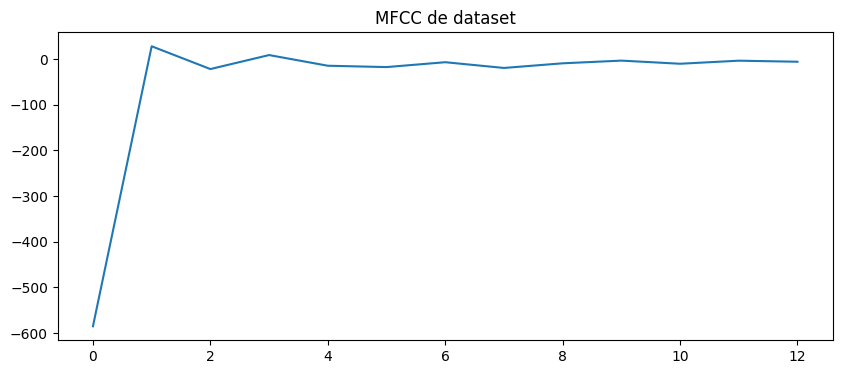

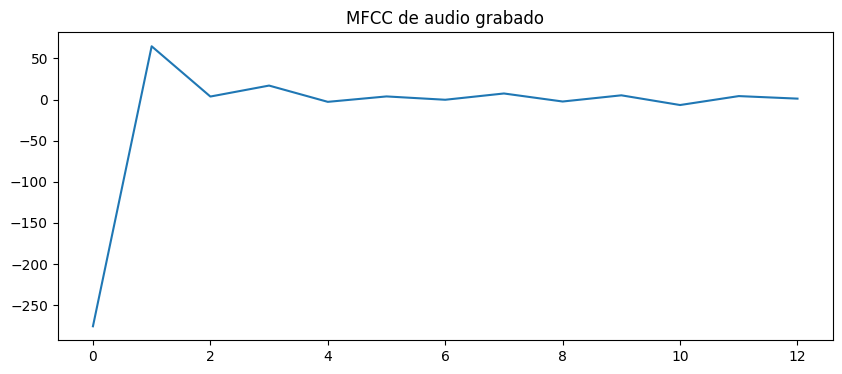

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.title("MFCC de dataset")
plt.plot(X_train[0])
plt.show()

plt.figure(figsize=(10,4))
plt.title("MFCC de audio grabado")
plt.plot(nuevas_caracteristicas)
plt.show()